In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

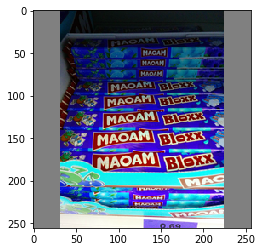

In [40]:
# Draw a diagonal blue line with thickness of 5 px
imgBGR = cv2.imread('train_1b.png')
plt.imshow(imgBGR)

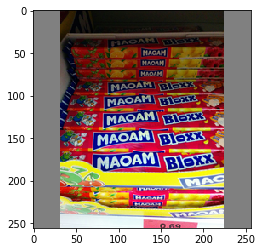

In [85]:
imgRGB = cv2.cvtColor(imgBGR , cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
img = imgRGB   # points to the same object
img1 = cv2.cvtColor(imgBGR , cv2.COLOR_BGR2RGB) # creates new object

## Basic Operations on Images

Goal

Learn to:
- Access pixel values and modify them
- Access image properties
- Setting Region of Image (ROI)
- Splitting and Merging images


### Accessing and Modifying pixel values

In [23]:
print(imgBGR.shape)
type(imgBGR)

#You can access a pixel value by its row and column coordinates. 
#For BGR image, it returns an array of Blue, Green, Red values. 
#For grayscale image, just corresponding intensity is returned.
#BGR
px = imgBGR[100,100]
print(px)
# accessing only blue pixel in BGR image
blue = imgBGR[100,100,0]
print(blue)
print(imgBGR[50,75])

#RGB
px = imgRGB[100,100]
print(px)
# accessing only red pixel in RGB image
blue = imgRGB[100,100,0]
print(blue)
print(imgRGB[50,75])

(256, 256, 3)
[  9  22 131]
9
[  6  18 122]
[131  22   9]
131
[122  18   6]


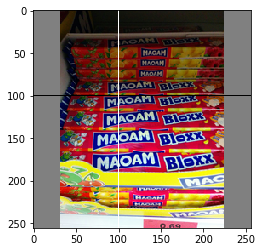

In [86]:
#You can modify the pixel values the same way.
img[100] = 0 # black
img[:,100] = 255 #white
plt.imshow(img)

In [42]:
#Numpy is a optimized library for fast array calculations. 
#So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.

#For individual pixel access, Numpy array methods, array.item() and array.itemset() is considered to be better. 
#But it always returns a scalar. 
#So if you want to access all B,G,R values, you need to call array.item() separately for all.

# accessing RED value
imgBGR.item(10,10,2)

128

In [43]:
# modifying RED value
imgBGR.itemset((10,10,2),100)
imgBGR.item(10,10,2)

100

### Accessing Image Properties

In [45]:
# Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

#Total number of pixels is accessed by img.size:
print(img.size)
#Image datatype is obtained by img.dtype:
print(img.dtype)
#img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.


196608
uint8


### Image ROI

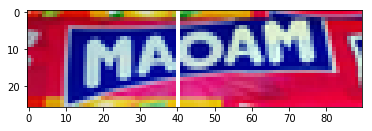

In [87]:
#Sometimes, you will have to play with certain region of images. 
#For eye detection in images, first face detection is done all over the image and when face is obtained, 
#we select the face region alone and search for eyes inside it instead of searching whole image. 
#It improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area)

#ROI is again obtained using Numpy indexing. 
#Here I am selecting the part of image and copying it to another region in the image:

maoambar = img[139:165,60:150]
plt.imshow(maoambar)

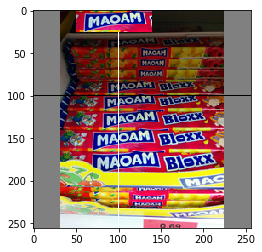

In [88]:
img[0:26, 50:140] = maoambar
plt.imshow(img)

### Splitting and Merging Image Channels

In [59]:
#Sometimes you will need to work separately on B,G,R channels of image. 
#Then you need to split the BGR images to single planes. 
#Or another time, you may need to join these individual channels to BGR image. You can do it simply by:

b,g,r = cv2.split(imgBGR)
print(b[100,100])
print(b.shape)

#Warning cv2.split() is a costly operation (in terms of time). 
#So do it only if you need it. Otherwise go for Numpy indexing.

9
(256, 256)


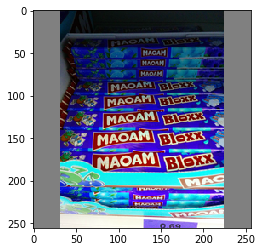

In [60]:
imgBGR2 = cv2.merge((b,g,r))
plt.imshow(imgBGR2)

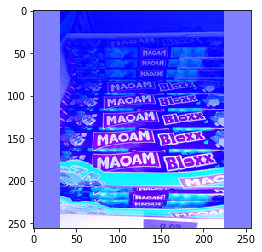

In [61]:
#Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. 
#You can simply use Numpy indexing, and that is more faster.
imgBGR2[:,:,2] = 255
plt.imshow(imgBGR2)

### Making Borders for Images (Padding)

If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function. 
But it has more applications for convolution operation, zero padding etc. 

This function takes following arguments:

- src - input image
- top, bottom, left, right - border width in number of pixels in corresponding directions
- borderType - Flag defining what kind of border to be added. It can be following types:
    - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
    - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    - cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
    - value - Color of border if border type is cv2.BORDER_CONSTANT

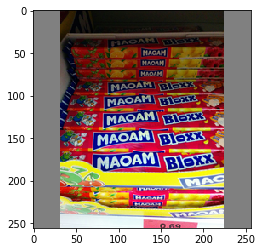

In [89]:
plt.imshow(img1)

(<matplotlib.axes._subplots.AxesSubplot at 0x12c90fb38>,
 Text(0.5, 1.0, 'BORDER_CONSTANT'))

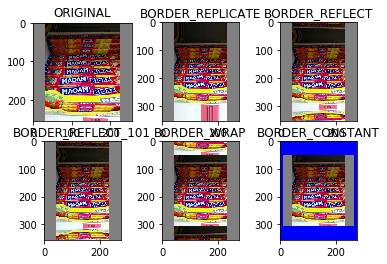

In [101]:
BLUE = [0,0,255]

replicate = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img1,50,50,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('BORDER_REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('BORDER_REFLECT')
plt.subplot(234),plt.imshow(reflect_101,'gray'),plt.title('BORDER_REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('BORDER_WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('BORDER_CONSTANT')
